In [ ]:
# Deep learning : Neural network with many layers

In [3]:
import tensorflow as tf
import numpy as np

In [2]:
tf.__version__

'2.1.0'

In [2]:
mnist = tf.keras.datasets.mnist

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0


11493376/11490434 [==============================] - 28s 2us/step


In [3]:
x_train_full.shape

(60000, 28, 28)

In [4]:
y_train_full.shape

(60000,)

In [5]:
y_train_full[2]

4

In [6]:
# one-hot encoding
y_train_full_onehot = np.zeros((y_train_full.size, y_train_full.max()+1))
y_train_full_onehot[np.arange(y_train_full.size),y_train_full] = 1

In [7]:
y_train_full[0]

5

In [8]:
# after one-hot encoding
y_train_full_onehot[0,]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [10]:
# among train data -> train & validate
x_train, x_valid  = x_train_full[0:50000, :, :], x_train_full[50000:, :, :]

In [11]:
y_train, y_valid  = y_train_full_onehot[0:50000, :], y_train_full_onehot[50000:, :]

### train(50000), valid(10000), test(10000)

In [12]:
x_train.shape

(50000, 28, 28)

In [13]:
y_train.shape

(50000, 10)

In [18]:
x_train[0,:,:].shape

(28, 28)

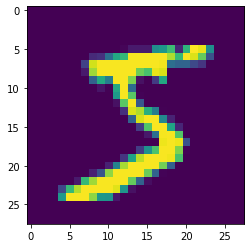

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0,:,:]) # 0th picture

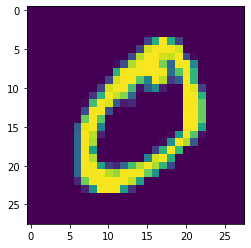

In [20]:
plt.imshow(x_train[1,:,:])

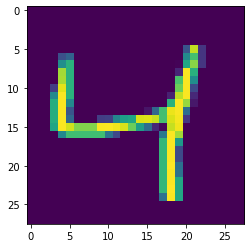

In [22]:
plt.imshow(x_train[2,:,:]) # 2nd

In [21]:
y_train[2,:]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # 0th layer
  tf.keras.layers.Dense(128, activation='relu'), # 1st layer : 784*128+128
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [16]:
# define L
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
# stochastic gradient descent algorithm 
# gradient descent처럼 모든 데이터를 다 미분하는 게 아니고 
# 한 스텝 옮길 때마다 sigma 중에 몇 개만 뽑아서 여러번 (batch) -> 매 iteration마다 randomly chose
# 128개의 batch (for each move, parameter is moving), 500번 정도 해야 모든 데이터를 다 사용
# epoch 20 바퀴 돌아라 -> epoch을 올릴 수록 accuracy 증가
# validation : train이 잘 되는지 정보를 주기 위함 (val_loss, val_accuracy)
# accuray : 정확도 - train accuracy : mostly better and better
# 따라서 val_accuracy가 계속 증가하는지를 봐야 함

In [23]:
history =  model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid), batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 14us/sample - loss: 0.1794 - accuracy: 0.9492 - val_loss: 0.1760 - val_accuracy: 0.9513
Epoch 2/20
50000/50000 [==============================] - 1s 23us/sample - loss: 0.1747 - accuracy: 0.9498 - val_loss: 0.1729 - val_accuracy: 0.9519
Epoch 3/20
50000/50000 [==============================] - 3s 60us/sample - loss: 0.1704 - accuracy: 0.9517 - val_loss: 0.1665 - val_accuracy: 0.9537
Epoch 4/20
50000/50000 [==============================] - 2s 44us/sample - loss: 0.1662 - accuracy: 0.9521 - val_loss: 0.1631 - val_accuracy: 0.9554
Epoch 5/20
50000/50000 [==============================] - 2s 36us/sample - loss: 0.1621 - accuracy: 0.9538 - val_loss: 0.1613 - val_accuracy: 0.9553
Epoch 6/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.1583 - accuracy: 0.9550 - val_loss: 0.1571 - val_accuracy: 0.9565
Epoch 7/20
50000/50000 [==============================] 

In [29]:
history =  model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 2s 31us/sample - loss: 0.1157 - accuracy: 0.9676 - val_loss: 0.1294 - val_accuracy: 0.9635
Epoch 2/30
50000/50000 [==============================] - 2s 49us/sample - loss: 0.1136 - accuracy: 0.9679 - val_loss: 0.1250 - val_accuracy: 0.9646
Epoch 3/30
50000/50000 [==============================] - 2s 39us/sample - loss: 0.1117 - accuracy: 0.9681 - val_loss: 0.1243 - val_accuracy: 0.9649
Epoch 4/30
50000/50000 [==============================] - 2s 41us/sample - loss: 0.1095 - accuracy: 0.9694 - val_loss: 0.1229 - val_accuracy: 0.9663
Epoch 5/30
50000/50000 [==============================] - 2s 31us/sample - loss: 0.1077 - accuracy: 0.9693 - val_loss: 0.1214 - val_accuracy: 0.9665
Epoch 6/30
50000/50000 [==============================] - 1s 30us/sample - loss: 0.1057 - accuracy: 0.9704 - val_loss: 0.1208 - val_accuracy: 0.9659
Epoch 7/30
50000/50000 [==============================] 

In [ ]:
# google colabotory - cloud

## Let's draw learning curve

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
a = history.history

In [26]:
a.keys() # dictionary

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

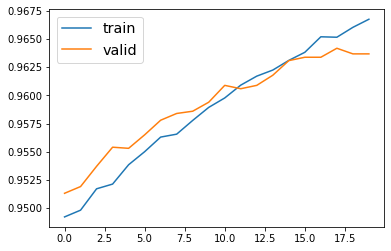

In [28]:
plt.plot(a["accuracy"], label="train")
plt.plot(a["val_accuracy"], label="valid")
plt.legend(fontsize='x-large')
plt.show()

In [30]:
a = history.history

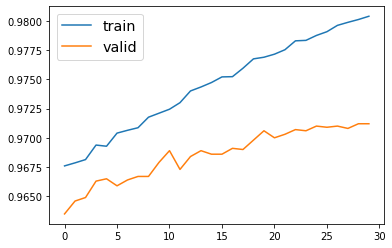

In [31]:
plt.plot(a["accuracy"], label="train")
plt.plot(a["val_accuracy"], label="valid")
plt.legend(fontsize='x-large')
plt.show()
# train is always good, valid : little bit flat (stop or not)
# finally val_accuracy : 97%

## Predictive analysis in Test data set

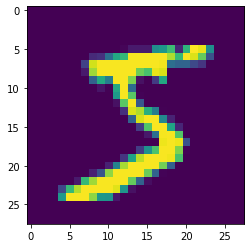

In [33]:
plt.imshow(x_train[0,:,:])

In [36]:
y_train[0, :]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [41]:
y_pred = model.predict(x_train)
y_pred[0,:]
# 99% 5

array([1.1944930e-07, 1.9433463e-07, 2.7127862e-05, 1.3849593e-02,
       1.8362323e-12, 9.8612261e-01, 3.4668182e-11, 4.4255081e-08,
       3.5707373e-08, 4.0594156e-07], dtype=float32)

In [42]:
print(y_pred.shape) # dimension

(50000, 10)


In [43]:
y_pred_class = np.argmax(y_pred, axis=1) # which is best

In [44]:
y_pred_class[0]

5

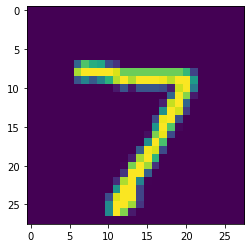

In [45]:
plt.imshow(x_test[0,:,:])

In [46]:
y_pred = model.predict(x_test)
y_pred[0,:]

array([6.4372296e-05, 6.6478299e-07, 3.6091596e-04, 1.3369783e-03,
       2.3672527e-07, 4.2162487e-06, 2.1588240e-10, 9.9818891e-01,
       8.8055622e-06, 3.4845907e-05], dtype=float32)

In [47]:
y_pred_class = np.argmax(y_pred, axis=1) # axis not 0

In [48]:
print(y_pred_class[0]) # test data ...

7


In [49]:
np.mean(y_test == y_pred_class)

0.9718

## Which figure went wrong?

In [50]:
aa = (y_test == y_pred_class)

In [51]:
aa[0:10]

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

In [52]:
bb = np.arange(0, 10000)

In [53]:
cc = bb[aa==False]

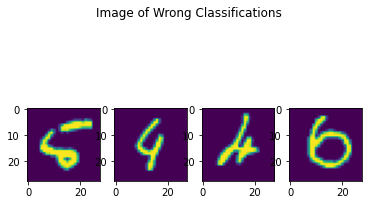

In [158]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle('Image of Wrong Classifications')
ax1.imshow(x_test[cc[0],])
ax2.imshow(x_test[cc[1],])
ax3.imshow(x_test[cc[2],])
ax4.imshow(x_test[cc[3],])

In [ ]:
# 첫번째 그림 maybe 6? 5의 확률도 15% 정도 존재

In [159]:
print(y_pred_class[cc[0:4],], y_test[cc[0:4]])

[6 9 2 0] [5 4 4 6]


### Image of Correct Classification

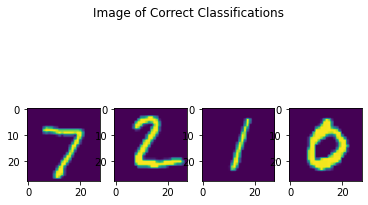

In [160]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle('Image of Correct Classifications')
ax1.imshow(x_test[0,])
ax2.imshow(x_test[1,])
ax3.imshow(x_test[2,])
ax4.imshow(x_test[3,])

In [162]:
print(y_pred_class[0:4,], y_test[0:4])

[7 2 1 0] [7 2 1 0]


## Multinomial Logistic Regression

In [164]:
m_logistic_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [165]:
m_logistic_model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
m_logistic_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [168]:
m_logistic_history =  m_logistic_model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid), batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 28us/sample - loss: 1.3955 - accuracy: 0.6674 - val_loss: 0.8738 - val_accuracy: 0.8407
Epoch 2/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.7832 - accuracy: 0.8318 - val_loss: 0.6371 - val_accuracy: 0.8656
Epoch 3/20
50000/50000 [==============================] - 1s 20us/sample - loss: 0.6360 - accuracy: 0.8518 - val_loss: 0.5434 - val_accuracy: 0.8771
Epoch 4/20
50000/50000 [==============================] - 1s 20us/sample - loss: 0.5653 - accuracy: 0.8628 - val_loss: 0.4923 - val_accuracy: 0.8834
Epoch 5/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.5222 - accuracy: 0.8694 - val_loss: 0.4589 - val_accuracy: 0.8883
Epoch 6/20
50000/50000 [==============================] - 1s 22us/sample - loss: 0.4926 - accuracy: 0.8739 - val_loss: 0.4359 - val_accuracy: 0.8913
Epoch 7/20
50000/50000 [==============================] 

In [ ]:
# 더 이상 val_accuracy의 값이 증가하지 않음
# 나쁘진 않지만 neural network보다는 성능이 떨어짐
# tensorflow version of multivariate logistic regression
# Why NN is working well?
# How do we improve NN?

In [ ]:
# Hands-on Machine learning ... tensorflow 2nd edition
# chapter

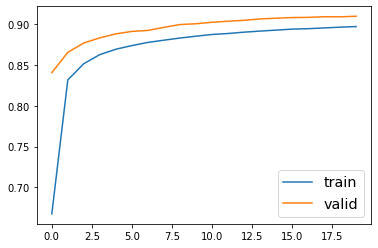

In [169]:
a = m_logistic_history.history
plt.plot(a["accuracy"], label="train")
plt.plot(a["val_accuracy"], label="valid")
plt.legend(fontsize='x-large')
plt.show()

In [172]:
y_pred_logistic = m_logistic_model.predict(x_test)
y_pred_logistic[0,:]

array([3.67651257e-04, 2.21080199e-06, 3.16101941e-04, 2.14435393e-03,
       7.22445766e-05, 1.18915275e-04, 5.65385335e-06, 9.93860602e-01,
       2.55093008e-04, 2.85719242e-03], dtype=float32)

In [173]:
y_pred_logistic_class = np.argmax(y_pred_logistic, axis=1)

In [174]:
np.mean(y_test == y_pred_logistic_class)

0.9071